# WeatherPy
----
## Overall Analysis
* Latitude and Temperature have a strong correlations throughout the study. The scatterplot gives statistical evidence that the closer to 0 degrees latitude, the higher the temperatures. There were, however, several outliers for this graph at 40 degrees that disrupted the bell curve.
* Both the Northern and Southern Hemishperes showed strong correlations witht the Latitude and Temperature filter with Northern having a strong negative correlation and Southern having a strong positive correlation. 
* Out of the cities randomly chosen for this study. There were little to no correlation with latitude and wind speed, cloudiness, or humidity. The only other graph that showed correlation was with the Southern Hemisphere in the comparison between cloudiness and latitude. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Created Lists
lat_lngs = []
cities = []

# Inputed Random Coordinates
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Found Closest cities
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Starting Travel")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# Created For Loop 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. On the Road to Next City...")

print("-----------------------------")
print("Data Retrieval Complete! Hope you enjoyed your trip!")
print("-----------------------------")

Starting Travel
-----------------------------
Processing Record 1 of Set 1 : flinders
Processing Record 2 of Set 1 : ranong
Processing Record 3 of Set 1 : mataura
City not found. On the Road to Next City...
Processing Record 4 of Set 1 : victoria
Processing Record 5 of Set 1 : barrow
Processing Record 6 of Set 1 : wilmington
Processing Record 7 of Set 1 : katherine
Processing Record 8 of Set 1 : belize
Processing Record 9 of Set 1 : kaitangata
Processing Record 10 of Set 1 : achit
Processing Record 11 of Set 1 : cape town
Processing Record 12 of Set 1 : kavaratti
Processing Record 13 of Set 1 : sterling
Processing Record 14 of Set 1 : petatlan
Processing Record 15 of Set 1 : ancud
Processing Record 16 of Set 1 : busselton
Processing Record 17 of Set 1 : tuatapere
Processing Record 18 of Set 1 : bluff
Processing Record 19 of Set 1 : ferrol
Processing Record 20 of Set 1 : albany
Processing Record 21 of Set 1 : puerto ayora
Processing Record 22 of Set 1 : ahipara
Processing Record 23 of S

Processing Record 34 of Set 4 : ilulissat
Processing Record 35 of Set 4 : puri
Processing Record 36 of Set 4 : abu dhabi
Processing Record 37 of Set 4 : comodoro rivadavia
Processing Record 38 of Set 4 : port hardy
Processing Record 39 of Set 4 : yerbogachen
Processing Record 40 of Set 4 : fukue
Processing Record 41 of Set 4 : bilibino
Processing Record 42 of Set 4 : kedrovyy
Processing Record 43 of Set 4 : khatanga
Processing Record 44 of Set 4 : pritzwalk
Processing Record 45 of Set 4 : manta
Processing Record 46 of Set 4 : salalah
Processing Record 47 of Set 4 : indi
Processing Record 48 of Set 4 : geraldton
Processing Record 49 of Set 4 : seoul
Processing Record 50 of Set 4 : luderitz
Processing Record 0 of Set 5 : bandarbeyla
Processing Record 1 of Set 5 : torbay
Processing Record 2 of Set 5 : tenenkou
City not found. On the Road to Next City...
Processing Record 3 of Set 5 : cherskiy
Processing Record 4 of Set 5 : lorengau
Processing Record 5 of Set 5 : charters towers
Processing

City not found. On the Road to Next City...
Processing Record 18 of Set 8 : souillac
Processing Record 19 of Set 8 : beruwala
Processing Record 20 of Set 8 : phan thiet
Processing Record 21 of Set 8 : gyanpur
Processing Record 22 of Set 8 : dvinskoy
Processing Record 23 of Set 8 : iskateley
Processing Record 24 of Set 8 : japura
Processing Record 25 of Set 8 : vagur
Processing Record 26 of Set 8 : sechura
Processing Record 27 of Set 8 : birao
Processing Record 28 of Set 8 : nemuro
Processing Record 29 of Set 8 : quatre cocos
Processing Record 30 of Set 8 : yaan
Processing Record 31 of Set 8 : novovasylivka
Processing Record 32 of Set 8 : naifaru
Processing Record 33 of Set 8 : palmer
Processing Record 34 of Set 8 : dalton
Processing Record 35 of Set 8 : gawler
Processing Record 36 of Set 8 : carballo
Processing Record 37 of Set 8 : iroquois falls
Processing Record 38 of Set 8 : petropavlovsk-kamchatskiy
Processing Record 39 of Set 8 : boulder city
Processing Record 40 of Set 8 : marsha

Processing Record 0 of Set 12 : west wendover
Processing Record 1 of Set 12 : mubi
Processing Record 2 of Set 12 : boende
Processing Record 3 of Set 12 : santa luzia
Processing Record 4 of Set 12 : huntsville
Processing Record 5 of Set 12 : wattegama
Processing Record 6 of Set 12 : porbandar
Processing Record 7 of Set 12 : verkhoyansk
Processing Record 8 of Set 12 : kitgum
Processing Record 9 of Set 12 : sur
Processing Record 10 of Set 12 : monrovia
Processing Record 11 of Set 12 : xichang
Processing Record 12 of Set 12 : chivilcoy
Processing Record 13 of Set 12 : santa rosalia
Processing Record 14 of Set 12 : erenhot
Processing Record 15 of Set 12 : waverley
Processing Record 16 of Set 12 : cockburn town
Processing Record 17 of Set 12 : am timan
City not found. On the Road to Next City...
Processing Record 18 of Set 12 : alugan
Processing Record 19 of Set 12 : cap malheureux
Processing Record 20 of Set 12 : bosaso
Processing Record 21 of Set 12 : saint-leu
City not found. On the Road 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Created Weather df
weather_list = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_list.head(10)

#Sent to CSV
weather_list.to_csv("Weather Output Data/cities_output.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 
No cities had 100% humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Analysis: Data points do increase the closer to 0 degrees latitude that the cities are. However, the highest temperatures are after the center of the arch at 0 and located at 40 degrees latitude


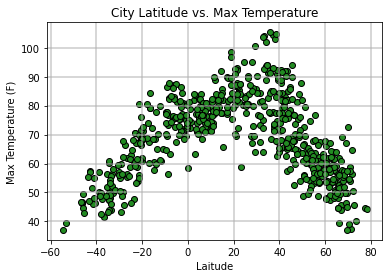

In [6]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Max Temp"], facecolor = "forestgreen", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")

# Format grid lines
plt.grid(linestyle='-', linewidth=2, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Max Temperature.png")

#Analysis 
print("Analysis: Data points do increase the closer to 0 degrees latitude that the cities are. However, the highest temperatures are after the center of the arch at 0 and located at 40 degrees latitude")

## Latitude vs. Humidity Plot

Analysis: The lowest humidity percentages are located at 40 and -20 degrees latitude but then increases at -40 and 60.


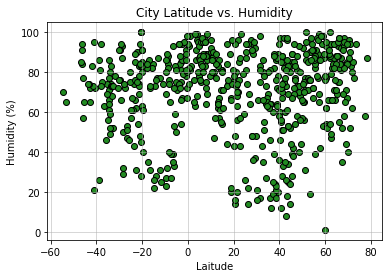

In [7]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Humidity"], facecolor = "forestgreen", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Format grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Humidity.png")

#Analysis
print("Analysis: The lowest humidity percentages are located at 40 and -20 degrees latitude but then increases at -40 and 60.")

## Latitude vs. Cloudiness Plot

Analysis: There does not seem to be any correlation between cloudiness and latitude


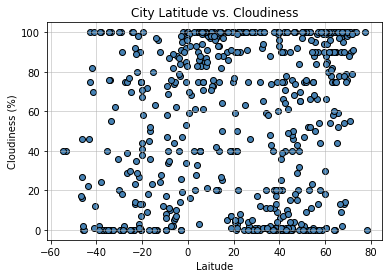

In [8]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_list["Lat"], weather_list["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Format grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Cloudiness.png")

#Analysis
print("Analysis: There does not seem to be any correlation between cloudiness and latitude")

## Latitude vs. Wind Speed Plot

Analysis: There is no concrete correlation between wind speed and latitude with the current data set


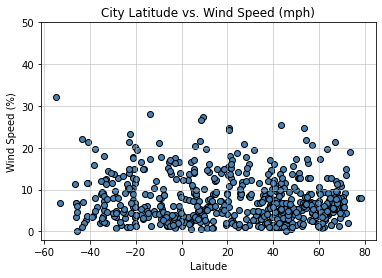

In [9]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_list["Lat"], weather_list["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title and labels
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Format grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Results Images/City Latitude vs Wind Speed (mph).png")

#Analysis
print("Analysis: There is no concrete correlation between wind speed and latitude with the current data set")

## Linear Regression

In [10]:
#Differentiate between Northern and Southern Hemispheres 
northern_hemisphere = weather_list.loc[weather_list["Lat"] >= 0]
southern_hemisphere = weather_list.loc[weather_list["Lat"] < 0]

In [11]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="green")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.65
Analysis: There is a moderate to strong negative correlation between Max Temperatures and Latitude in the Northern Hemisphere.


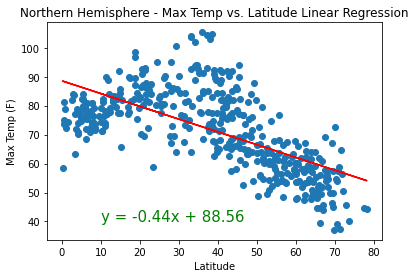

In [25]:
# Call first function 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call function #2
annotate(equation, 10, 40)

# Set title and labels 
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save plot to folder
plt.savefig("Results Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is a moderate to strong negative correlation between Max Temperatures and Latitude in the Northern Hemisphere.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.84
Analysis: There is a strong positive correlation between Max Temperature and Latitude in the Southern Hemisphere.


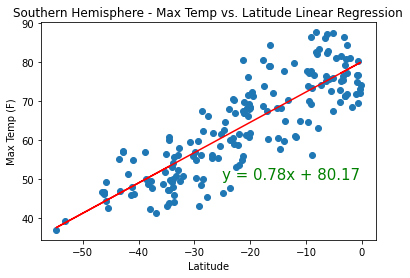

In [13]:
# Call first function 
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call second function 
annotate(equation, -25, 50)

# Set title and labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save plot to folder
plt.savefig("Results Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is a strong positive correlation between Max Temperature and Latitude in the Southern Hemisphere.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.01
Analysis: There is no correlation in Humidity vs Latitude in the Northern Hemisphere. 


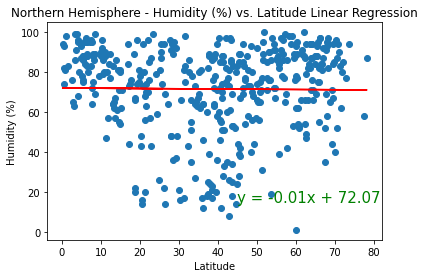

In [14]:
# Call first function 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call second function 
annotate(equation, 45, 15)

# Set title and labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save plot to folder
plt.savefig("Results Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is no correlation in Humidity vs Latitude in the Northern Hemisphere. ")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.02
Analysis:There is no correlation in Humidity vs Latitude in the Southern Hemisphere. 


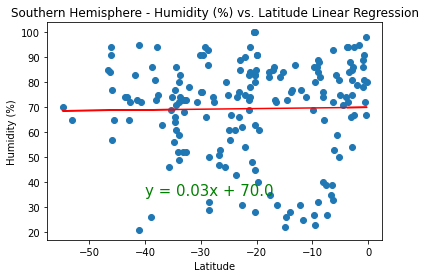

In [24]:
# Call first function 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call second function 
annotate(equation, -40, 35)

# Set title and labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save plot to folder
plt.savefig("Results Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

#Analysis
print("Analysis:There is no correlation in Humidity vs Latitude in the Southern Hemisphere. ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.02
Analysis: There is no correlation in Cloudiness vs Latitude in the Northern Hemisphere. 


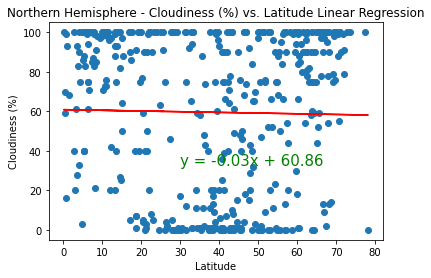

In [22]:
# Call first function 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call second function 
annotate(equation, 30, 33)

# Set title and labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save plot to folder
plt.savefig("Results Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is no correlation in Cloudiness vs Latitude in the Northern Hemisphere. ")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21
Analysis: There is a weak to moderate positive correlation in Cloudiness vs Latitude in the Sorthern Hemisphere. 


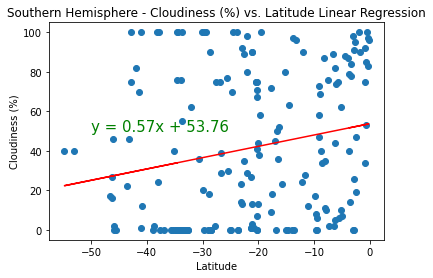

In [23]:
# Call first function 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call second function 
annotate(equation, -50, 50)

# Set title and labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save plot to folder
plt.savefig("Results Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#Analysis
print("Analysis: There is a weak to moderate positive correlation in Cloudiness vs Latitude in the Sorthern Hemisphere. ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.09
Analysis:There is no correlation in Wind Speed vs Latitude in the Northern Hemisphere. 


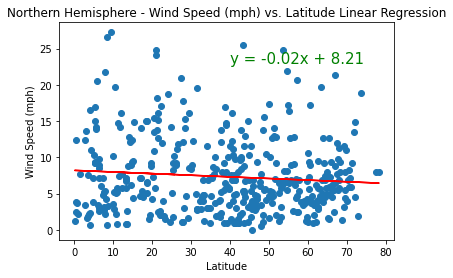

In [18]:
# Call first function 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call second function 
annotate(equation, 40, 23)

# Set title and labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save plot to folder
plt.savefig("Results Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

#Analysis
print("Analysis:There is no correlation in Wind Speed vs Latitude in the Northern Hemisphere. ")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.1
Analysis:There is a weak negative correlation in Wind Speed vs Latitude in the Sorthern Hemisphere. 


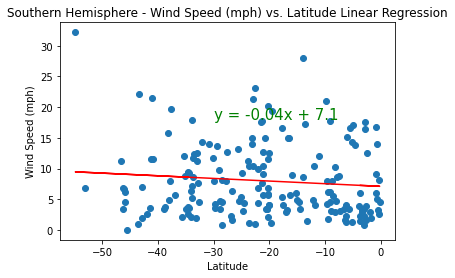

In [19]:
# Call first function 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call second function 
annotate(equation, -30, 18)

# Set title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save plot to folder
plt.savefig("Results Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

#Analysis
print("Analysis:There is a weak negative correlation in Wind Speed vs Latitude in the Sorthern Hemisphere. ")